# Numerische Verifizierung der eigenwertbasierten Stabilitätsanalyse

In [15]:
# wie immer, lass uns einige wichtige Module importieren
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

---

## Aufgabe 9.2

### Zusatz zu Aufgabe 9.2b)

In der Aufgabe wird gefragt, die Eigenwerte $(\Delta t \lambda_j)$ des diskreten räumlichen Operators $R(\phi)$ herzuleiten. Wenn Sie es noch nicht gemacht haben, leiten Sie den Ausdruck analytisch her und stellen Sie danach das Ergebnis hier graphisch dar. 

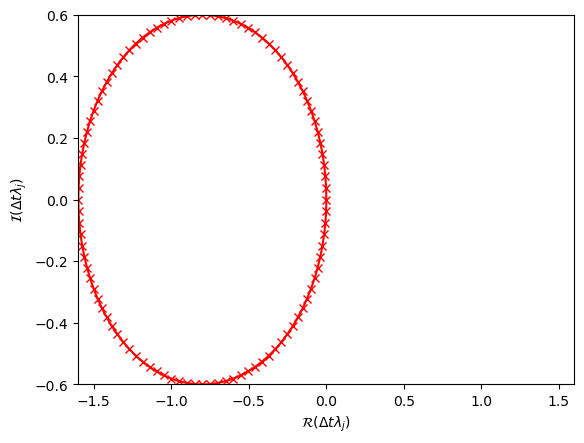

In [16]:
# Wir definieren den Vektor
# des Phasenwinkels theta, wobei 0<=theta<=2pi
# und diskretisieren theta mit 1000 Punkte
theta = np.linspace(0,2*np.pi,1000)

# Wir definieren zwei beliebige (sigma,beta)-Werte
sigma = 0.6
beta = 0.4

# Wir berechnen die Eigenwerte lambda*dt
lambda_dt = sigma*1j*np.sin(theta) + 2*beta*(np.cos(theta)-1) 

# ---------------------------------------------------------------
# BONUS! 
# Eigenwerte des diskreten Operators (numerisch)
#
# Um die Eigenwerte des diskreten Operators aus der diskreten
# Matrix R_delta zu berechnen, so wie in der Vorlesung besprochen, 
# müssen wir zuerst konkrete Diskretisierungparameter definieren
Lx = 1
Nx = 100
dx = Lx/Nx
# Wir definieren die Matrix R_delta
R_delta_dt = np.zeros([Nx,Nx])
# und füllen Sie aus (achten Sie auf die periodischen
#                     Randbedingungen!)
for i in range(Nx):
    R_delta_dt[i,i-1] += sigma*0.5 + beta
    R_delta_dt[i,i ]  += - 2*beta
    R_delta_dt[i,(i+1) % Nx] += -sigma*0.5 + beta
# Wir können die Eigenwerte der Matrix R_delta_dt berechnen
lambda_dt_num, eigv = np.linalg.eig(R_delta_dt)
# ---------------------------------------------------------------

# Wir stellen die Mende der Eigenwerte dar in dem
# Raum der komplexen Zahlen
plt.figure()
plt.plot(np.real(lambda_dt),np.imag(lambda_dt), 'r')
plt.plot(np.real(lambda_dt_num),np.imag(lambda_dt_num), 'rx')
plt.xlabel(r'$\mathcal{R}(\Delta t \lambda_j)$')
plt.ylabel(r'$\mathcal{I}(\Delta t \lambda_j)$')
plt.xlim(np.array([-4,4])*beta)
plt.ylim(np.array([-1,1])*sigma)
plt.show()

### Zusatz zu Aufgabe 9.2d)

In der Aufgabe wird gefragt, die Stabiltätsregion des vorgeschlagenen Runge--Kutta Verfahrens zu berechnen. Das Ergebnis ist ein komplexer Ausdruck, welcher sich am Besten graphisch darstellen lässt. Leiten Sie den Ausdruck für die marginale Stabilitätsregion und stellen das Ergebnis hier unten graphisch dar. 

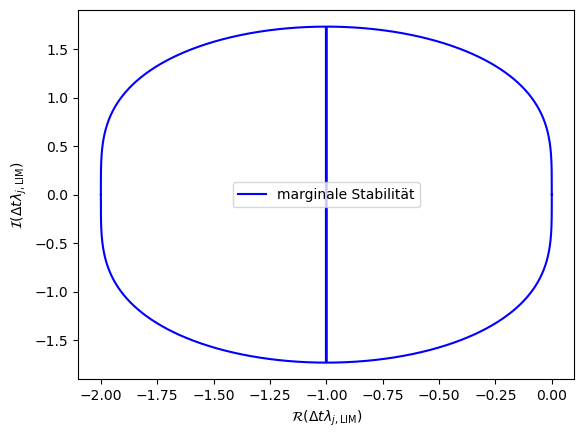

In [17]:
# Wir haben den Vektor theta hier oben bereits definiert

# Wir definieren den Ausdruck der marginalen Stabilität (dt*lambdaLIM).
# Das müssen wir sowohl für die Lösung mit + und -
lambdaLIM_dt_pos = -1 + np.sqrt(2*np.cos(theta)-1+2j*np.sin(theta))
lambdaLIM_dt_neg = -1 - np.sqrt(2*np.cos(theta)-1+2j*np.sin(theta))

# Wir stellen die Menge der Eigenwerte, welche zur marginalen Stabilität führen, 
# in dem Raum der komplexen Zahlen graphisch dar
plt.figure()
plt.plot(np.real(lambdaLIM_dt_pos),np.imag(lambdaLIM_dt_pos), 'b', label='marginale Stabilität')
plt.plot(np.real(lambdaLIM_dt_neg),np.imag(lambdaLIM_dt_neg), 'b')
plt.xlabel(r'$\mathcal{R}(\Delta t \lambda_{j,\mathrm{LIM}})$')
plt.ylabel(r'$\mathcal{I}(\Delta t \lambda_{j,\mathrm{LIM}})$')
plt.legend()
plt.show()

### Zusatz zu Aufgabe 9.2e)

In der Aufgabe wird gefragt, die Stabiltätsregion des Gesamtverfahrens zu berechnen. Diese ist von zwei Kurven eingeschlossen. Eine davon weist einen komplexen Ausdruck auf uns kann nur graphisch dargestellt werden. Stellen die neutrale Stabilitätskurven des Gesamtverfahrens dar.

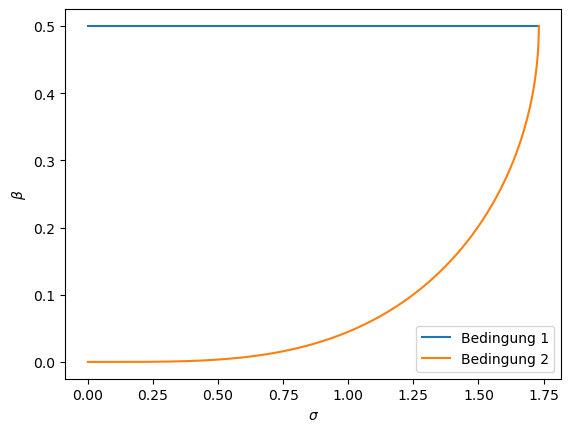

In [18]:
# Wir definieren theta neu, weil der bereich sich geänder hat
# und ist jetzt 0<=theta<=pi
theta = np.linspace(0,np.pi,1000)

# Wir gehen jetzt alle theta durch und finden die Paare (sigma, beta), die 
# zur marginalen Stabilität durch die zweite Bedingung führen 
# Es reicht hierfür, dass wir die Teillösung mit dem "+" berücksichtigen

S = -1 + np.sqrt(2*np.cos(theta)-1+2j*np.sin(theta)) 
beta_lim = -np.real(S)/2
sigma_lim = np.imag(S)


# Wir stellen das Ergebnis im Raum (sigma, beta) dar
plt.figure()
plt.plot(sigma_lim,0.5*np.ones(sigma_lim.shape), label='Bedingung 1')
plt.plot(sigma_lim,beta_lim, label='Bedingung 2')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\beta$')
plt.legend()
plt.plot()
plt.show()

### Aufgabe 9.3

earbeiten Sie Ihr Jupyter Notebook von Übung 8, so dass diese die Advektions-Diffunsionsgleichung Gleichung mit dem in Aufgabenteil 8.1 beschriebenen Verfahren lösen. 

Ihr Algorithmus könnte folgende Struktur aufweisen:
* Definieren Sie die notwendigen Parameter. 
* Definieren Sie die diskreten Vektoren $\mathbf{x}$ der KV Mittelpunkte, $\mathbf{\phi}$ der Lösungsvariablen, $\mathbf{\phi}^{(n)}$ der bereits berechneten Lösungsvariablen, und $\mathbf{F}$ der Flüsse an den KV Grenzflächen. 
* Initialisieren Sie den Lösungsvektor $\mathbf{\phi}$ mit der Anfangsbedingung
\begin{equation}
            \phi(x,t=0) = \cos(k_x x)    
\end{equation}
Wählen Sie als Wellenzahl $k_x=2\pi$.
        
* Iterieren Sie die Berechnung der Lösung im nächsten Zeitschritt für eine Anzahl von Zeitschritten $N_t=200$. Dieser Schritt beinhaltet folgende Operationen:
    - Iterieren Sie über die Anzahl von Stufen ($1,\cdots,K$) des Runge--Kutta Verfahrens
        + Speichern Sie die bereits berechnete Lösungsvariablen $\mathbf{\phi}^{(n)} \leftarrow \mathbf{\phi}$
        + Iterieren Sie über alle KV Grenzflächen, um die advektive und diffusive Flüsse zu berechnen und in den Vektor $\mathbf{F}$ zu speichern. 
        + Iterieren Sie über alle KV, um die Lösung durch die Bilanz der Flüsse zu aktualisieren.
* Stellen Sie das Ergebnis dar und verifizieren Sie diese, in dem Sie die numerische und analytische Lösung vergleichen. 

In [20]:
##########
# INPUTS #
##########

L = 1.0         # [m] Länge des Gebiets
U = 1.0         # [m/s] Advektionsgeschwindigkeit

Nt = 20         # Anzahl der zu berechnende Zeitschritte
Nx = 20         # Anzahl von Zellen / Kontrollvolumina (KV)
beta = 0.4      # dimensionsloser Parameter alfa/(dx^2/dt) = nu * dt / dx^2 = beta
sigma = 0.6     # dimensionsloser Parameter U/(dx/dt) = U * dt / dx = sigma

Definieren Sie die Vektoren $\mathbf{x}$ der Koordinaten von den Mittelpunkten der Kontrollvolumina (KV), $\mathbf{\phi}$ der unbekannten Lösungsvariable, $\mathbf{F}$ der Flüsse an den KV Grenzflächen. Nachdem Sie in dem oberen Block $L$ und $N_x$ definiert haben, können Sie jetzt die Breite $\Delta x$ des Kontrollvolumens auch definieren.  Die Zeitschrittweite $\Delta t$ und der Diffusionskoeffizienten $\nu$ werden aus den dimensionslosen Parametern $\beta$ und $\sigma$ hergeleitet.

In [21]:
dx = L/Nx                       # [m] Auflösung
dt = sigma * dx / U             # [s] Zeitschritt
nu = beta * dx**2 / dt          # [m^2/s] Diffusionskoeffizient

x = (np.arange(Nx)+0.5)*dx      # Gitter (Vektor der Koordinate von den KV Mittelpunkten)
x_I = (np.arange(Nx+1))*dx      # Gitter (Vektor der Koordinate der KV Grenzfflächen: nicht nötig für Berechnung!)
phi = np.zeros(Nx)              # Vektor der im KV gemittelten phi-Werte
phi_n = np.zeros(Nx)            # Vektor der im KV gemittelten phi-Werte im vorigen Zeitpunkt
F = np.zeros(Nx+1)              # Vektor der Flüsse an den KV Grenzflächen

Initialisieren Sie den Lösungsvektor $\mathbf{\phi}$ mit der in Aufgabenteil 8.1a) vorgegebenen Anfangsbedingung

$$ \phi(x,t=0) = A \cos (k_x x) \, . \qquad \qquad (2)$$

Wählen Sie als Wellenzahl $k_x=2\pi$ und $A=1$.

In [22]:
# Wir speichern die Anfangsbedingung in dem Vektor phi
phi += np.cos(2*np.pi*x)

Iterieren Sie die Berechnung der Lösung im nächsten Zeitschritt für eine Anzahl von Zeitschritten $N_t=200$. Dieser Schritt beinhaltet folgende Operationen:
        
* Iterieren Sie über alle KV Grenzflächen, um die advektive und diffusive Flüsse zu berechnen und in den Vektor $\mathbf{F}$ zu speichern. 
* Iterieren Sie über alle KV, um die Lösung durch die Bilanz der Flüsse zu aktualisieren.

In [23]:
# Zuerst definieren wir die Zeit
# vor der Integration sind wir beim Zeitpunkt null
t=0

# Wir können auch die Koeffizienten der Runge-Kutta Methode definieren
RK2 = np.array([0.5, 1.0])

# Wir starten die zeitliche Integration
# als For-Schleife für Nt Zeitschritte
for n in range(Nt):
    # Wir aktualisieren die Zeit
    t = t + dt
    # Die aktuelle Lösung ist jetzt die alte Lösung
    # (Vorsicht! Keine "view" herstellen sondern eine "copy")
    phi_n = phi.copy()
    # Wir iterieren über die Stufen der RK Methode
    for s in range(RK2.size):
        # Wir berechnen die Flüsse: Achten Sie auf 
        # die periodischen Randbedingungen! 
        for iF in range(Nx+1):
            # Wir berechnen die diffusive Flüsse (grad(phi)*n) 
            # mit den zentralen finiten Differenzen
            F[iF] = -nu*(phi[iF % Nx]-phi[iF-1])/dx
            # und dann die advektive Flüsse (U*phi) 
            # mit linearen Interpolation
            F[iF] += 0.5*U*(phi[iF % Nx] + phi[iF-1])
        # Wir aktualisieren die Lösung
        # durch die Bilanz der Flüsse
        for i in range(Nx):
            phi[i] = phi_n[i] + dt*RK2[s]*(F[i]-F[i+1])/dx


Bevor wir die Lösung darstellen, ist es sinnvoll, die analytische exakte Lösung des Problems zu implementieren. Das machen wir mit einer Funktion. 

In [24]:
# Wir definieren die Funktion, mit der wir die exakten Lösung definieren 
def phi_exakt(t,x,A,nu,U,kx):
    phi_exakt=A*np.cos(kx*(x-U*t))*np.exp(-nu*t*kx**2)
    return phi_exakt
    

# Wir können jetzt die exakte Lösung berechnen
x_ex = np.linspace(0,L,Nx)
phi_ex = phi_exakt(t,x_ex,1.0,nu,U,2*np.pi)

Stellen Sie das Ergebnis dar und überprüfen Sie diese, in dem Sie es mit dem erwarteten Ergebnis vergleichen. 

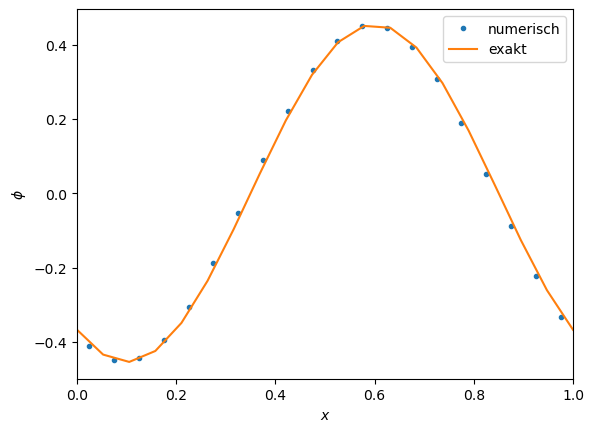

In [25]:
# Wir öffnen eine neue Abbildung
plt.figure()
# wir stellen die exakte und numerische Lösung dar
plt.plot(x,phi,'.',label='numerisch')
plt.plot(x_ex,phi_ex,label='exakt')
# wir setzen Grenzen für die x- und y-Achse:
# Wir sehen gleich wozu wir das brauchen
#plt.ylim([-1,1])
plt.xlim([0,1])
# wir zeigen die Legende an
plt.legend()
# und beschriften die Achsen
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.show()

Verifizieren Sie, dass Ihr Ergebnis bezüglich der Stabilität des numerischen Verfahren aus Aufgabe 8.2 korrekt ist und sich in die Stabilitätseigenschaften des Verfahrens tatsächlich wiederspiegelt. Um dies zu erreichen, variieren Sie in ihrem Jupyter Notebook die Parameter $\sigma = U / (\Delta x / \Delta t)$ und $\beta = \nu / (\Delta x^2 / \Delta t)$ im folgenden Bereich

$$ \sigma = 0 \cdots 1.8,  \qquad \beta = 0 \cdots 1.5 \, , $$

und beobachten Sie das Verhalten der Lösung. Für welche Werte von $(\sigma, \beta)$ ist die Lösung stabil? 
    
Hinweis: Sie können eine Fehlernorm zur von Ihnen berechneten analytischen Lösung verwenden, um in Ihrem Jupyter Notebook die Stabilität der Lösung zu bewerten. Erhöhen Sie hierfür die Anzahl von Zeitschritte zu $N_t=1000$.

In [26]:
# Gleich werden wir das obere Problem für unterschiedliche Werte von sigma und beta lösen müssen
#
# Es bietet sich also an, die Definition des Problems 
# und seine Lösung in eine Funktion zu implementieren
#
def solve_advdiff(Nx,Nt,U,L,sigma,beta):
    # zuerst definieren wir die abhängigen Parameter
    dx = L/Nx                       # [m] Auflösung
    # wenn sigma=0, dann muss U=0 und wir können den Zeitschritt nicht aus 
    # sigma berechnen. In diesem Fall müssen wir den Zeitschritt 
    # vorgeben
    if sigma==0:
        U  = 0
        dt = 1e-3
    else:
        dt = sigma * dx / U             # [s] Zeitschritt
    nu = beta * dx**2 / dt          # [m^2/s] Diffusionskoeffizient
 
    # und die Vektoren der Koordinaten und Lösungsvektoren
    x = (np.arange(Nx)+0.5)*dx      # Gitter (Vektor der Koordinate von den KV Mittelpunkten)
    x_I = (np.arange(Nx+1))*dx      # Gitter (Vektor der Koordinate der KV Grenzfflächen: nicht nötig für Berechnung!)
    phi = np.zeros(Nx)              # Vektor der im KV gemittelten phi-Werte
    phi_n = np.zeros(Nx)            # Vektor der im KV gemittelten phi-Werte im vorigen Zeitpunkt
    F = np.zeros(Nx+1)              # Vektor der Flüsse an den KV Grenzflächen

    # Wir speichern die Anfangsbedingung in dem Vektor phi
    phi = np.cos(2*np.pi*x)
    
    # Wenn beide beta und sigma null sind, 
    # dann passiert nichts in der Gleichung: wir haben
    # weder diffusion noch advektion
    if sigma==0 and beta==0:
        return x, phi, phi

    # Zuerst definieren wir die Zeit
    # vor der Integration sind wir beim Zeitpunkt null
    t=0
    
    # Wir starten die zeitliche Integration
    # als For-Schleife für Nt Zeitschritte
    for n in range(Nt):
        # Wir aktualisieren die Zeit
        t = t + dt
        # Die aktuelle Lösung ist jetzt die alte Lösung
        # (Vorsicht! Keine "view" herstellen sondern eine "copy")
        phi_n = phi.copy()
        # Wir iterieren über die Stufen der RK Methode
        for s in range(RK2.size):
            # Wir berechnen die Flüsse: Achten Sie auf 
            # die periodischen Randbedingungen! 
            for iF in range(Nx+1):
                # Wir berechnen die diffusive Flüsse (grad(phi)*n) 
                # mit den zentralen finiten Differenzen
                F[iF] = -nu*(phi[iF % Nx]-phi[iF-1])/dx
                # und dann die advektive Flüsse (U*phi) 
                # mit linearen Interpolation
                F[iF] += 0.5*U*(phi[iF % Nx] + phi[iF-1])
            # Wir aktualisieren die Lösung
            # durch die Bilanz der Flüsse
            for i in range(Nx):
                phi[i] = phi_n[i] + dt*RK2[s]*(F[i]-F[i+1])/dx
  
    # Wir können gleich auch die analytische Lösung berechnen
    phi_ex = phi_exakt(t,x,1.0,nu,U,2*np.pi)
    
    # Die Funktion soll die Lösung und die Koordinate zurückgeben
    return x,phi,phi_ex
    
    
# Wir können eine weitere Funktion definieren, mit der wir durch den Vergleich
# mit der analytischen Lösung bestimmen können, ob die Lösung stabil war
def isStabil(phi,phi_ex):
    # Berechne den maximalen Fehler 
    Emax = np.max(np.abs(phi-phi_ex))
    return Emax<10

Jetzt sind wir bereit, um tatsächlich den Parameterraum zu untesuchen

In [27]:
sigmas = np.linspace(0,1.8,20)   # Parameterraum sigma
betas  = np.linspace(0,1.5,20)   # Parameterraum beta
# Array von "dtype=bool" mit True-Werte, wenn die Kombination (sigma,beta) stabil ist
stable = np.zeros((sigmas.size,betas.size),dtype=bool)   
# Wir erhähren die Anzahl von Zeitschritten
Nt = 1000

# Loop für alle sigma
for iS,sigma in enumerate(sigmas):
    # Loop für alle betas
    for iB,beta in enumerate(betas):
        # Löse die Gleichung
        x,phi,phi_ex = solve_advdiff(Nx,Nt,U,L,sigma,beta)
        # Kontrolliere die Stabilität
        stable[iS,iB] = isStabil(phi,phi_ex)

C:\Users\david_w8bhnro\AppData\Local\Temp\ipykernel_26800\368533742.py:54: RuntimeWarning: overflow encountered in double_scalars
  F[iF] = -nu*(phi[iF % Nx]-phi[iF-1])/dx
C:\Users\david_w8bhnro\AppData\Local\Temp\ipykernel_26800\368533742.py:57: RuntimeWarning: invalid value encountered in double_scalars
  F[iF] += 0.5*U*(phi[iF % Nx] + phi[iF-1])
C:\Users\david_w8bhnro\AppData\Local\Temp\ipykernel_26800\368533742.py:61: RuntimeWarning: overflow encountered in double_scalars
  phi[i] = phi_n[i] + dt*RK2[s]*(F[i]-F[i+1])/dx


Stellen Sie das Ergebnis des Aufgabenteils 9.3b) in einem Diagramm dar, welches auf der Ordinate den Parameter $\beta$ und auf der Abszisse den Parameter $\sigma$ zeigt. Kennzeichnen Sie mit dem Symbol $\times$ die $(\sigma,\beta)$-Kombinationen, die zu einer stabilen Lösung geführt haben. Die instabile Fälle werden ansonsten mit dem Symbol $\circ$ gekennzeichnet. Stellen im selben Diagramm auch die Kurven der neutralen Stabilitätsgrenze, so wie sie diese in Aufgabe 9.2 bestimmt haben. Stimmen die numerischen Ergebnisse mit Ihrer Erwartung aus der Stabilitätsanalyse überein?

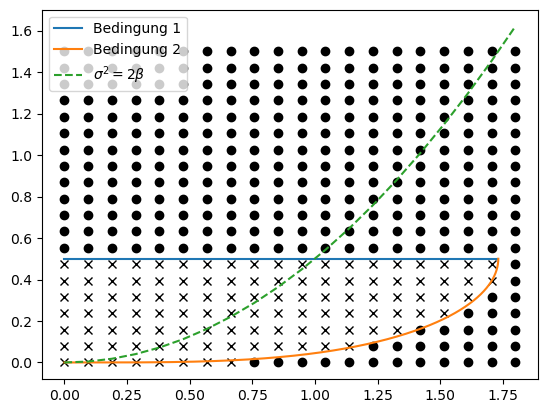

In [28]:
# Wir öffnen eine neue Abbildung
plt.figure()
# Wir gehe die Fälle durch und plotten sie
# Loop für alle sigma
for iS,sigma in enumerate(sigmas):
    # Loop für alle betas
    for iB,beta in enumerate(betas):
        # Fall-Unterscheidung in Abhängigkeit
        # der Stabilität
        if stable[iS,iB]:   #wenn stabil
            # Plotten mit x
            plt.plot(sigma,beta,'kx')
        else:               #wenn instabil
            # Plotten mit o
            plt.plot(sigma,beta,'ko')
# Wir plotten auch die Kurven aus der Stabilitätsanalyse
plt.plot(sigma_lim,0.5*np.ones(sigma_lim.shape), label='Bedingung 1')
plt.plot(sigma_lim,beta_lim, label='Bedingung 2')
# Das war die zweite Stabilitätsbedingung für Euler-Explizit
plt.plot(sigmas, 0.5*sigmas**2, '--', label=r'$\sigma^2=2 \beta$')
# Wir plotten eie Legende
plt.legend()
plt.show()

**freiwillige Vertiefung** Betrachten Sie jetzt das gleiche problem wie bisher aber ohne periodische Randbedingungen. Stattdessen wird am linken Rand eine Dirchlet Randbedingung verwendet:

\begin{equation}
        \phi_0 = \phi_L(t) \,
\end{equation}
    
wobei  $\phi_L(t) = \cos (k_x U t)$. Am rechten Rand verwenden Sie die folgende sogenannte \textit{konvektive Auslassbedingung}:
    
\begin{equation}
        (\phi_{/t})_R = -(U\phi_{/x})_R\,
\end{equation}
    
welche Sie mit einem Aufwind-verfahren erster Ordnung diskretisieren, damit Sie keine Lösungsvariablen außerhalb des Lösungsgebietes benötigen. 

Schreiben Sie die räumlich diskretisierte Advektions-Diffusionsgleichung in die folgende Form um 

\begin{equation}
        \frac{\mathrm{d} \mathbf{U}}{\mathrm{d}t} = \mathsf{S}\mathbf{U} + \mathbf{Q} \,
\end{equation}
    
sehen Sie hierzu Vorlesung 10. Berechnen Sie die Eigenwerte $\lambda_j$ der Matrix $\mathsf{S}$ für unterschiedliche Werte von $\sigma$ und $\beta$ und stellen Sie diese in den komplexen Raum dar, nachdem Sie die Eigenwerte mit $\Delta t$ multipliziert haben. 
    

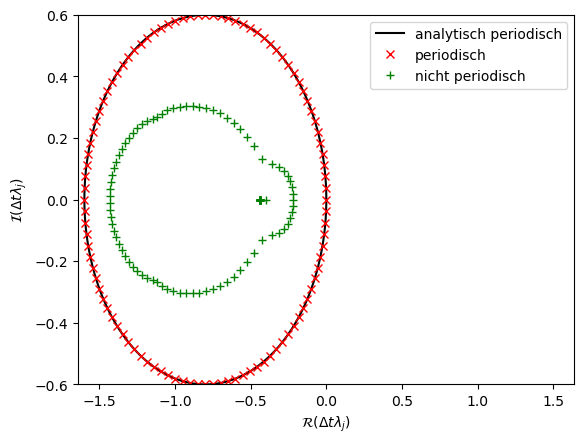

In [29]:
# Wir definieren den Vektor
# des Phasenwinkels theta, wobei 0<=theta<=2pi
# und diskretisieren theta mit 1000 Punkte
#
# Das hatten wir am Anfang schon gemacht; der Vektor
# ist inzwischen wieder überschrieben worden
theta = np.linspace(0,2*np.pi,1000)

# Damit wir mit den Eigenwerten des periodischen Falls
# am Anfang vergleichen können, wählen wir wieder die 
# gleichen Werte von sigma und beta
sigma = 0.6
beta = 0.4


# Eigenwerte des diskreten Operators (numerisch)
#
# Um die Eigenwerte des diskreten Operators aus der diskreten
# Matrix R_delta zu berechnen, so wie in der Vorlesung besprochen, 
# müssen wir zuerst konkrete Diskretisierungparameter definieren
#
# Wir wählen die Parameter so wie in Aufgabe 9.2b)
Lx = 1
Nx = 100
dx = Lx/Nx
# Wir definieren die Matrix R_delta
R_delta_dt_neu = np.zeros([Nx,Nx])
# und füllen Sie aus (achten Sie auf die geänderten Randbedingungen!)
for i in range(Nx-1):
    # Wir haben keine periodischen Randbedingung mehr, 
    # der durch die Dirichler-Randbeidnugn bekannten linken
    # Nachbar ist in dem Vektor Q mit dem jeweiligen Vorkoeffizienten
    if i>0: 
        R_delta_dt_neu[i,i-1] += sigma*0.5 + beta
    R_delta_dt_neu[i,i ]  += - 2*beta
    R_delta_dt_neu[i,i+1] += -sigma*0.5 + beta
# In der letzten Zeile der Matrix haben wir die konvektive Ausflussbedingung
R_delta_dt_neu[-1,-1] = -sigma
R_delta_dt_neu[-1,-2] =  sigma
    
# Wir können die Eigenwerte der Matrix R_delta_dt berechnen
lambda_dt_num_neu, eigv = np.linalg.eig(R_delta_dt_neu)
# ---------------------------------------------------------------

# Wir stellen die Mende der Eigenwerte dar in dem
# Raum der komplexen Zahlen
plt.figure()
plt.plot(np.real(lambda_dt),np.imag(lambda_dt), 'k', label='analytisch periodisch')
plt.plot(np.real(lambda_dt_num),np.imag(lambda_dt_num), 'rx', label='periodisch')
plt.plot(np.real(lambda_dt_num_neu),np.imag(lambda_dt_num_neu), 'g+', label='nicht periodisch')
plt.xlabel(r'$\mathcal{R}(\Delta t \lambda_j)$')
plt.ylabel(r'$\mathcal{I}(\Delta t \lambda_j)$')
plt.xlim(np.array([-4.1,4.1])*beta)
plt.ylim(np.array([-1,1])*sigma)
plt.legend()
plt.show()

Wir beobachten, dass die neuen Randbedingungen zu einer Verrigenrung des Betrags der Eigenwerte vom räumlichen Operator (im Vergleich zum periodischen Fall) führen. Tatsächlich liege alle Eigenwerde innerhalb der Ellipse vom periodischen Fall. Die Dirchlet-Randbedingung zusammen mit der mit Aufwind diskretisierten Ausflussrandbedingung haben einen dämpfenden Effekt auf die quasidiskrete Gleichung.